# Frequentist Inference Case Study

## Learning objectives


Welcome to the Statistical Frequentist Inference Case Study! This case study is designed to help you apply the concepts of Frequentist inference using Python. Specifically, you will practice writing Python code to implement the following statistical concepts:

The z-statistic

The t-statistic

Understanding the difference and relationship between the two

Exploring the Central Limit Theorem, including its assumptions and consequences

Estimating the population mean and standard deviation from a sample

Understanding the concept of a sampling distribution of a test statistic, particularly for the mean

Combining these concepts to calculate a confidence interval

## Medical Charges of Hospital

Picture yourself as a data scientist hired by a hospital. The hospital administrator, tasked with developing the hospital's business operations plan, seeks your assistance in addressing some key business inquiries.

Within this assignment notebook, you'll employ frequentist statistical inference techniques on a dataset to provide insights into the following questions:

Has the hospital's revenue fallen below a critical threshold?
Are patients with insurance indeed billed differently compared to those without insurance?
Addressing the latter question using a frequentist approach necessitates certain assumptions and an understanding of the characteristics of the two patient groups.

We are using some data from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

Download Dataset : [Medical DataSet](https://drive.google.com/file/d/1ZlgW4op1tR5f2I1a_Be754yuJiOWn9X_/view?usp=sharing)

For the purpose of this case study, let's assume that the observations are obtained through random sampling from our single hospital. As discussed in a previous assignment, we introduced the Central Limit Theorem (CLT), which states that as the sample size ($n$) increases, the distributions of sample statistics tend to approach a normal distribution. What's remarkable about this theorem is its applicability to the sampling distributions of statistics, even when the original data distributions are highly non-normal. Additionally, hypothesis testing heavily relies on making inferences about such sample statistics. In this notebook, you will heavily lean on the CLT to apply frequentist (parametric) tests to address the questions at hand.

In [37]:
#import the libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st 
from scipy import stats
from numpy.random import seed
import os 
#file_path = os.path.abspath('C:\Users\USER\Downloads\ins_data.csv')
#file_path = 'C:\Users\USER\Downloads\ins_data.csv'

medical_data = pd.read_csv(r'C:\Users\USER\Downloads\ins_data.csv')
#not the r in front of file path 'C:\Users...csv'. This is so it ignores the \ back slashes. 
#If the file were in the following format, C:/Users/USER....csv', of forward slashes / we would not need the r. 

In [33]:
#check the shape of the data
medical_data.shape

(1338, 8)

In [36]:
#check the info of the data
medical_data.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Create a histogram representing the distribution of charges and compute both the mean and standard deviation. Provide insights regarding the suitability of these statistics for the dataset.

A:

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Insurance Charges')

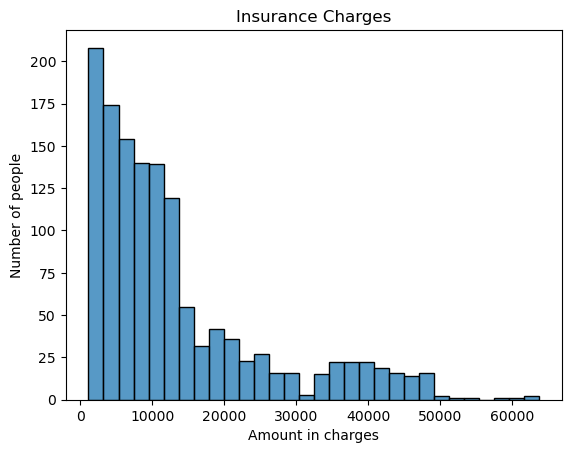

In [61]:
#This dataset is concerned with charges for claims that are being produced by individuals in said dataset. 
sns.histplot(data = medical_data, x = 'charges')
medical_data['charges'].mean()
plt.xlabel('Amount in charges')
plt.ylabel('Number of people')
plt.title('Insurance Charges')

In [77]:
x=round(medical_data['charges'])

In [75]:
x.std()

12110.012882303801

In [81]:
round(x.std(), 2)

12110.01

In [83]:
medical_data.shape

(1338, 8)

__Q2:__ The administrator is worried that the true average charge has dropped below $12,000, which could jeopardize the hospital's operational model. Given the assumption that these data constitute a random sample of charges, how would you substantiate that these data enable you to address this concern? Additionally, which of the discussed frequentist tests would be the most suitable to apply in this scenario?

__A:

In [85]:
medical_data.mean()

age                  39.207025
sex                   0.505232
bmi                  30.663397
children              1.094918
smoker                0.204783
region                1.515695
charges           13270.422265
insuranceclaim        0.585202
dtype: float64

In [ ]:
Due to the calcuations of the mean and spread of the mean, hence the standard deviation, I would say that our data is fairly accurate.
The data was specifically focused on the charges column, and from there said calculations were completed on this particular data set. 


__Q3:__ Considering the nature of the administrator's concern, which confidence interval is appropriate in this situation: a one-sided or two-sided interval? Proceed to compute the critical value and the corresponding 95% confidence interval for the mean, and provide feedback on whether the administrator's concern is warranted.

__A:__

In [105]:
# create 95% confidence interval 
st.t.interval(confidence=0.95,
              df=len(medical_data['charges'])-1, 
              loc=np.mean(medical_data['charges']), 
              scale=st.sem(medical_data['charges']))

#This confidence interval displays the probability that our mean falls within a 95% confidence interval. 
#Confidence intervals measure the degree of uncertainty or certainty in a sampling method. The mean, after several random samples, 
# should fall between these two intervals. 


(12620.954034192644, 13919.890496089869)

In [9]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__

In [59]:
#Null Hypothesis - This hypothesis states that there is no difference between groups or no relationship between variables. 
#The null hypothesis is a presumption of status quo or no change.
#Any changes witnessed in an experiment are because of random chance and not because of changes made to variables in the experiment. Similar to 
#removing rooms in a house, yet the house is the same size/square footage. 




array([  -93.18601699, -5448.102229  ,  -265.94372142, -2242.52742019,
       -6777.18821066, -2432.79548862,    39.85720159, -5522.72925345])

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy-1.12.0/reference/stats.html) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__

In [63]:
t_stat, p_value = stats.ttest_1samp(medical_data, 75)
t_stat

array([  -93.18601699, -5448.102229  ,  -265.94372142, -2242.52742019,
       -6777.18821066, -2432.79548862,    39.85720159, -5522.72925345])

In [61]:
p_value

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 1.33542652e-229, 0.00000000e+000])

In [67]:
t_stat, p_value = stats.ttest_1samp(medical_data['charges'], 30)
t_stat

39.993125547508896

In [69]:
p_value

1.1216830234785879e-230

Congratulations! Hopefully, you obtained identical numerical results, indicating accurate manual calculations. Secondly, by employing the correct function, you realized how much simpler it is to use. All that's required is passing your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

In [ ]:
The scipy.stats library in Python provides many statistical test functions, but it doesn't have a dedicated function for performing a z-test directly, like it does for t-tests (scipy.stats.ttest_* functions).

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test